In [595]:
import numpy as np

# Максимум 5 баллов - по 1 баллу за задание

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [596]:
#1.1
def MultDiag(x):
    '''
    Рассчет произведения на диагонали с использованием numpy
    Самый красивый и лаконичный метод (и скорее всего самый быстрый)
    '''
    diag=  np.diag(x)
    return np.prod(diag[diag!=0])

In [597]:
#1.2
def MultDiag_with_for(x):
    '''
    Рассчет произведения на диагонали без использования numpy
    По рабоче-крестьянски
    '''
    x=x.tolist()
    i = len(x)
    j = len(x[0])
    result = 1
    for ind in range(min(i,j)):
        if x[ind][ind]!=0:

            result*=x[ind][ind]
    return(result)

In [598]:
#1.3
def MultDiag_with_for_partially(x):
    '''
    Рассчет произведения на диагонали с частичным использованием numpy
    Из numpy взяли только функцию, возвращающую диагональ (например, мы не знаем про np.prod)
    '''
    diag=  np.diag(x).tolist()
    result = 1
    for elem in diag:
        if elem!=0:
            result*=elem
    return result
    

In [599]:

x = np.array([[999, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])

In [600]:
MultDiag_with_for(x)

2997

In [601]:
MultDiag(x)

2997

In [602]:
MultDiag_with_for_partially(x)

2997

### 2. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [603]:
#2.1
def multiset_no_for(x,y):
    '''
    Мультимножество с помощью встроенной в питон структуры set()
    Как по мне, ничего больше и не надо
    '''
    return set(x)==set(y)

In [604]:
#2.2
def multiset_with_for(x,y):
    '''
    Мультимножество с циклом
    '''
    if len(x)!=len(y):
        return False
    x.sort()
    y.sort()

    for i in range(len(x)):
        if x[i]!=y[i]:
            return False
    return True

In [605]:
#2.3
def multiset_with_vectors(x,y):
    '''
    Мультимножество с помощью методов numpy
    '''
    
    return np.array_equal(np.sort(x),np.sort(y))

In [606]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

In [607]:
multiset_no_for(x.tolist(), y.tolist())

True

In [608]:
multiset_with_vectors(x,y)

True

In [609]:
multiset_with_for(x.tolist(), y.tolist())

True

### 3. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [610]:
#3.1
def MaxAfterNull_with_for(x):
    '''
    функция с циклом for
    '''
    x=x.tolist()
    maxi = min(x)
    for i in range(1,len(x)):
        if x[i-1]==0:
            maxi = max(x[i], maxi)

    return maxi

In [611]:
#3.2
def MaxAfterNull_vector(x):
    '''
    решению с помощью методов numpy и срезов
    Немного тяжело читать код, зато он короткий 
    '''
    nonzero_inds = np.nonzero(x)[0]  #ненулевые элементы
    distance = abs(nonzero_inds[1:]-nonzero_inds[:-1]) #расстояние между элементами. Если оно больше одного, то перед элементом нуль
    
    max_index = max(nonzero_inds[1:][distance>1]) #

    return x[max_index]


In [612]:
#3.3
def MaxAfterNull_vector_partial(x):
    '''
    Решение с частичным использованием numpy
    Из numpy воспользовался только функцией np.nonzero, все остальное сделал циклом
    '''
    nonzero_inds = np.nonzero(x)[0].tolist()
    x = x.tolist()

    maxi = min(x)
    for ind in range(1, len(nonzero_inds)):
        if (nonzero_inds[ind] - nonzero_inds[ind-1]) > 1 :
            maxi = max(x[nonzero_inds[ind]], maxi)
    return maxi

In [613]:
x = np.array([1, 2, 0, -2, 0, 91 ])

In [614]:
MaxAfterNull_with_for(x)

91

In [615]:
MaxAfterNull_vector(x)

91

In [616]:
MaxAfterNull_vector_partial(x)

91

### 4. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [617]:
from PIL import Image
import matplotlib.pyplot as plt

In [618]:
convolution = np.array([0.299, 0.587, 0.114])

In [619]:
# img_pillow = Image.open('kotiki.jpg')
# img = np.array(img_pillow)


In [642]:
img = plt.imread('kotiki.jpg')
img.shape # (height, width, channels)

(801, 1200, 3)

(801, 1200, 3)

In [643]:
def ToGrey_vectors(img, conv):
    return img @ conv

In [647]:
resulted_image = ToGrey_vectors(img, convolution)

In [648]:
Image.fromarray(ToGrey_vectors(img, convolution)).show()



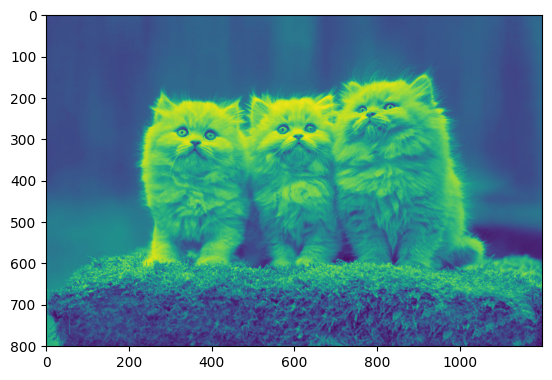

In [656]:
plt.imshow(resulted_image.astype(np.float32)/255.0) ;

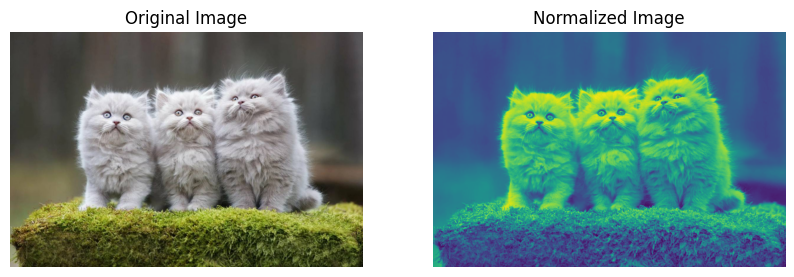

In [659]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
filename = "kotiki.jpg"  # Replace "your_image.jpg" with the filename of your image
img = mpimg.imread(filename)

# Normalize the colors
normalized_img = (img@convolution).astype(np.float32) / 255.0  # For uint8 image
# normalized_img = img.astype(np.float32)  # If the image is already in the range [0, 1]

# Display the original and normalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Normalized Image')
plt.imshow(normalized_img)
plt.axis('off')

plt.show()


In [661]:
normalized_img

array([[0.21899214, 0.21899214, 0.21899214, ..., 0.3409412 , 0.3409412 ,
        0.3409412 ],
       [0.21899214, 0.21899214, 0.21899214, ..., 0.3409412 , 0.3409412 ,
        0.3409412 ],
       [0.21899214, 0.21899214, 0.21899214, ..., 0.3409412 , 0.3409412 ,
        0.3409412 ],
       ...,
       [0.61622745, 0.61622745, 0.6153333 , ..., 0.07760392, 0.03928236,
        0.03143921],
       [0.61622745, 0.6153333 , 0.6167412 , ..., 0.10226274, 0.05799608,
        0.05128235],
       [0.6102823 , 0.6116902 , 0.6156118 , ..., 0.19544314, 0.06215294,
        0.06603137]], dtype=float32)

### 5. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. 
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

In [627]:
x = np.array([100,100, 2, 2, 3, 3, 3, 5, 1, 1])

In [628]:
#5.1
def runLengthEncoding_with_for(x):
    ''' самый читаемый и предположительно самый медленный вариант - на циклах
    '''
    x=x.tolist()
    
    elements = []
    elements_count = []
    count = 1
    for i in range(1,len(x)):
        
        if x[i-1]==x[i]:
            count+=1

        elif x[i-1]!=x[i]:
            elements.append(x[i-1])
            elements_count.append(count)
            count=1
    elements.append(x[i])
    elements_count.append(count)
    return np.array(elements),np.array(elements_count)






In [629]:
#5.2
def runLengthEncoding_vectors(x):
    '''
    функция подсчета количества подряд идущих цифр

    именно эта версия получилась самой корявой и нечитаемой, зато рабочей :)
    '''
    distance = np.diff(x) #взяли разницу между элементами, получили расстояние. длина distance = len(x)-1

    #нам нужны только те индексы, где элемент меняется, в остальных случаях расстояние 0
    nonzero_distance = np.nonzero(np.append(distance,[1]))[0]  #также мы добавляем к этому массиву еще один элемент (ненулевой), тогда мы сможем посчитать все вплоть до x[-1] элемента
    
    return np.append(x[0],x[1:][distance.astype('bool')]) , np.append(nonzero_distance[0]+1 , nonzero_distance[1:] - nonzero_distance[:-1])


In [630]:
#5.3
def runLengthEncoding_vectors_partial(x):
    '''   
    вариант с частичным использованием numpy 
    
    '''
    x=x.tolist()
    distance = np.diff(x).tolist()
    
    x_not_repeat = [x[i] for i in range(len(x)-1) if x[i+1]!=x[i]]
    x_not_repeat.append(x[-1])

    
    num_counts = []
    count=1
    for i in range(len(distance)):
        if distance[i]==0:
            count+=1
        else:
            num_counts.append(count)
            count=1
    num_counts.append(count)
    return np.array(x_not_repeat), np.array(num_counts)




In [631]:
runLengthEncoding_with_for(x)

(array([100,   2,   3,   5,   1]), array([2, 2, 3, 1, 2]))

In [632]:
runLengthEncoding_vectors(x)

(array([100,   2,   3,   5,   1]), array([2, 2, 3, 1, 2], dtype=int64))

In [633]:
runLengthEncoding_vectors_partial(x)

(array([100,   2,   3,   5,   1]), array([2, 2, 3, 1, 2]))

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

# Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один
вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab, разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

In [634]:
#Deadline - 20 марта в 23:59